# OilyGiant

## Inicialización

In [1]:
#importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Cargar datos

In [2]:
#cargar el archivo
try:
    geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    geo_0 = pd.read_csv(r'\datasets\geo_data_0.csv')

In [3]:
geo_0.info()
geo_0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
#cargar el archivo
try:
    geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    geo_1 = pd.read_csv(r'\datasets\geo_data_1.csv')

In [5]:
geo_1.info()
geo_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
#cargar el archivo
try:
    geo_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo_2 = pd.read_csv(r'\datasets\geo_data_2.csv')

In [7]:
geo_2.info()
geo_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
geo_0.duplicated().sum()

0

In [9]:
geo_1.duplicated().sum()

0

In [10]:
geo_2.duplicated().sum()

0

No hay datos duplicados, se procederá con la segmentación.

## Segmentación de datos

In [11]:
#Eliminamos la columna id
geo_0 = geo_0.drop('id', axis = 1)
geo_1 = geo_1.drop('id', axis = 1)
geo_2 = geo_2.drop('id', axis = 1)

In [12]:
features_geo0 = geo_0.drop(['product'], axis = 1)
target_geo0 = geo_0['product']

In [13]:
def fig(df):
    for i in ['f0', 'f1', 'f2']:
        df[i].plot(kind = 'hist')
        plt.show()

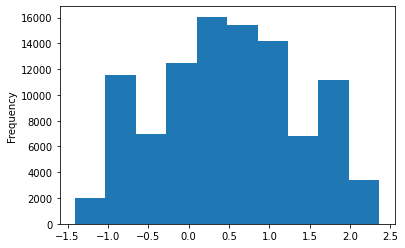

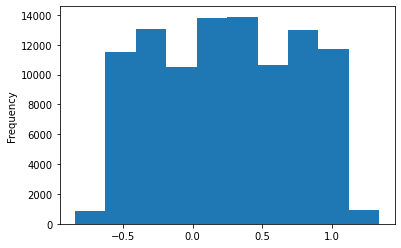

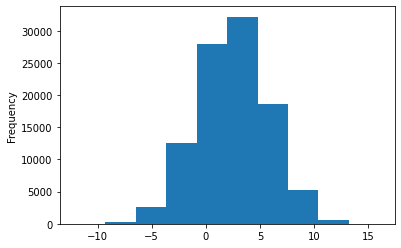

In [14]:
fig(geo_0)

Se tiene diferentes escalas numericas, por lo que se procederá a estandarizar los datos.

In [15]:
#Región geo_0
features0_train, features0_valid, target0_train, target0_valid = train_test_split(features_geo0, target_geo0, test_size = 0.25, 
                                                                              random_state = 12345)

In [16]:
#Estandarizar datos
numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()
scaler.fit(features0_train[numeric])
features0_train[numeric] = scaler.transform(features0_train[numeric])
features0_valid[numeric] = scaler.transform(features0_valid[numeric])

pd.options.mode.chained_assignment = None
features0_train.head()


/tmp/ipykernel_184/3828064078.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features0_train[numeric] = scaler.transform(features0_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865
70185,-1.837105,0.010321,-0.147634
82230,-1.299243,0.987558,1.273181


In [17]:
# Modelo de regresion lineal
model = LinearRegression()
model.fit(features0_train, target0_train)
predicted_valid0 = model.predict(features0_valid)
predicted_valid0

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

In [18]:
#volumen medio del conjunto de validacion
print('media:', predicted_valid0.mean())

media: 92.59256778438035


In [19]:
mse = mean_squared_error(target0_valid, predicted_valid0)
print('RMSE:', mse**0.5)

RMSE: 37.5794217150813


In [20]:
#Función para las regiones geo_1 y geo_2

def for_regions(features_train, features_valid, target_train, target_valid):
    
    #Estandarizar datos
    numeric = ['f0', 'f1', 'f2']

    scaler = StandardScaler()
    scaler.fit(features0_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    # Modelo de regresion lineal
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    
    #volumen medio del conjunto de validacion
    print('media', predicted_valid.mean())
    
    mse = mean_squared_error(target_valid, predicted_valid)
    print('RMSE', mse**0.5)

In [21]:
# Para la region geo_1
features_geo1 = geo_1.drop(['product'], axis = 1)
target_geo1 = geo_1['product']

features1_train, features1_valid, target1_train, target1_valid = train_test_split(features_geo1, target_geo1, test_size = 0.25,
                                                                                 random_state = 12345)

In [22]:
# Usamos la funcion
for_regions(features1_train, features1_valid, target1_train, target1_valid)
pd.options.mode.chained_assignment = None

media 68.728546895446
RMSE 0.893099286775617


In [23]:
# Para la region geo_2
features_geo2 = geo_2.drop(['product'], axis = 1)
target_geo2 = geo_2['product']

features2_train, features2_valid, target2_train, target2_valid = train_test_split(features_geo2, target_geo2, test_size = 0.25,
                                                                                 random_state = 12345)

In [24]:
# Usamos la funcion
for_regions(features2_train, features2_valid, target2_train, target2_valid)
pd.options.mode.chained_assignment = None

media 94.96504596800489
RMSE 40.02970873393434


Se observa una media mayor en la región *geo_2*. Por otra parte, la región *geo_1* presenta un menor error cuadratico medio el cual podria ser un indicio de selección para la region.

## Cálculo de ganancia

In [25]:
cantidad_pozos = 200
inversion = 100000000
media = inversion/cantidad_pozos
ingreso = 4500
unid_to_inv = media / 4500

#cantidad de unidades de barriles para evitar perdidas
round(unid_to_inv,2)

111.11

Se observa que el valor 111.1 en miles en barriles, supera la media obtenida por las regiones *geo_0, geo_1, geo_2*.

## Ganancia para un conjunto de pozos

In [26]:
#Región 0
#indexacion
target0_valid = target0_valid.reset_index(drop = True)
#Convertir a series
predicted_valid0 = pd.Series(predicted_valid0)

In [27]:
#Region 1
model.fit(features1_train, target1_train)
predicted_valid1 = model.predict(features1_valid)
#indexacion
target1_valid = target1_valid.reset_index(drop = True)
#Convertir a series
predicted_valid1 = pd.Series(predicted_valid1)


In [28]:
#Region 2
model.fit(features2_train, target2_train)
predicted_valid2 = model.predict(features2_valid)
#indexacion
target2_valid = target2_valid.reset_index(drop = True)
#Convertir a series
predicted_valid2 = pd.Series(predicted_valid2)


In [29]:
# Se define una funcion para saber la ganancia por región y para su uso en la siguiente función
def ganancia(target, prediction):
    #mejores predicciones
    pred_sort = prediction.sort_values(ascending = False)
    
    #mejores 200 target
    target_sort = target[pred_sort.index][:200]
    
    return (target_sort.sum()*ingreso)-inversion



### Región geo_0

In [30]:
# Ganancia potencial para la region geo_0 en sus 200 principales pozos
print('Ganancia potencial para la region geo_0 en sus 200 principales pozos', ganancia(target0_valid, predicted_valid0))

Ganancia potencial para la region geo_0 en sus 200 principales pozos 33208260.43139851


### Región geo_1

In [31]:
# Ganancia potencial para la region geo_1 en sus 200 principales pozos
print('Ganancia potencial para la region geo_1 en sus 200 principales pozos', ganancia(target1_valid, predicted_valid1))

Ganancia potencial para la region geo_1 en sus 200 principales pozos 24150866.966815114


### Región geo_2

In [32]:
# Ganancia potencial para la region geo_2 en sus 200 principales pozos
print('Ganancia potencial para la region geo_2 en sus 200 principales pozos', ganancia(target2_valid, predicted_valid2))

Ganancia potencial para la region geo_2 en sus 200 principales pozos 27103499.635998324


## Riesgos y ganancias

In [33]:
#Función para calcular ingresos calculados
state = np.random.RandomState(12345)

def riesgo_ganan(target, predictions):
    predictions = pd.Series(predictions)
    target = target.reset_index(drop=True)
    values = []

    for i in range(1000):
        pred_subsample = predictions.sample(n=500, replace=True, random_state=state) 
        target_subsample = target[pred_subsample.index] 
        values.append(ganancia(target_subsample,pred_subsample))

    values = pd.Series(values)
    mean = values.mean()
    print("Beneficios promedio:", mean)
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    print('Intervalo de confianza del 95%:[',lower,' , ',upper,']')
    
    riesgo = len(values[values < 0]) / len(values)*100
    print('Riesgo de pérdidas:',riesgo,'%')
    

### Región geo_0

In [34]:
riesgo_ganan(target0_valid, predicted_valid0)

Beneficios promedio: 4259385.269105923
Intervalo de confianza del 95%:[ -1020900.9483793724  ,  9479763.533583675 ]
Riesgo de pérdidas: 6.0 %


### Región geo_1

In [35]:
riesgo_ganan(target1_valid, predicted_valid1)

Beneficios promedio: 5182594.93697325
Intervalo de confianza del 95%:[ 1281232.3143308456  ,  9536129.820669085 ]
Riesgo de pérdidas: 0.3 %


### Región geo_2

In [36]:
riesgo_ganan(target2_valid, predicted_valid2)

Beneficios promedio: 4201940.0534405
Intervalo de confianza del 95%:[ -1158526.0916001017  ,  9896299.398445744 ]
Riesgo de pérdidas: 6.2 %


## Conclusiones

1. Se estandarizó los datos para una adecuada escala numérica.

2. Se obtiene una media mayor en la región *geo_2*. La región *geo_1* presenta un menor error cuadratico medio el cual podria ser un indicio de selección para la region.

3. En cuanto a ganancia para un conjunto de pozos, la mayor se obtiene en la region *geo_0*.

4. Utilizando el bootstrapping se tiene en un intervalo de confianza del 95% que la region *geo_1* es la sugerida para desarrollar los pozos, ádemas que esta se presenta con un riesgo menor al 1%, en comparación del 6% de las otras dos regiones.